# Algorithms for Linear Regression

# Normal Equation doesn't have an imp. in Scikit-Learn because of the direct use of the coefficients in the equation

# Singular Value Descomposition (SVD)

In [196]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Load the dataset

In [197]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/AI/datasets/smartphones_sales.csv')

In [198]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [199]:
df

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [201]:
df.drop("Models", axis=1, inplace=True)

In [202]:
df.drop("Colors", axis=1, inplace=True)

In [203]:
df.drop("Mobile", axis=1, inplace=True)

In [204]:
df.drop("Memory", axis=1, inplace=True)

In [205]:
df.drop("Storage", axis=1, inplace=True)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Camera               3114 non-null   object 
 2   Rating               2970 non-null   float64
 3   Selling Price        3114 non-null   int64  
 4   Original Price       3114 non-null   int64  
 5   Discount             3114 non-null   int64  
 6   discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 170.4+ KB


In [207]:
df.head()

,Brands,Camera,Rating,Selling Price,Original Price,Discount,discount percentage
0,SAMSUNG,Yes,4.3,19330,20999,1669,7.947998
1,Nokia,Yes,3.8,10199,10199,0,0.000000
2,realme,Yes,4.4,6999,7999,1000,12.501563
3,Infinix,Yes,4.2,12999,12999,0,0.000000
4,Apple,Yes,4.6,49900,49900,0,0.000000


In [208]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


Visualize the data

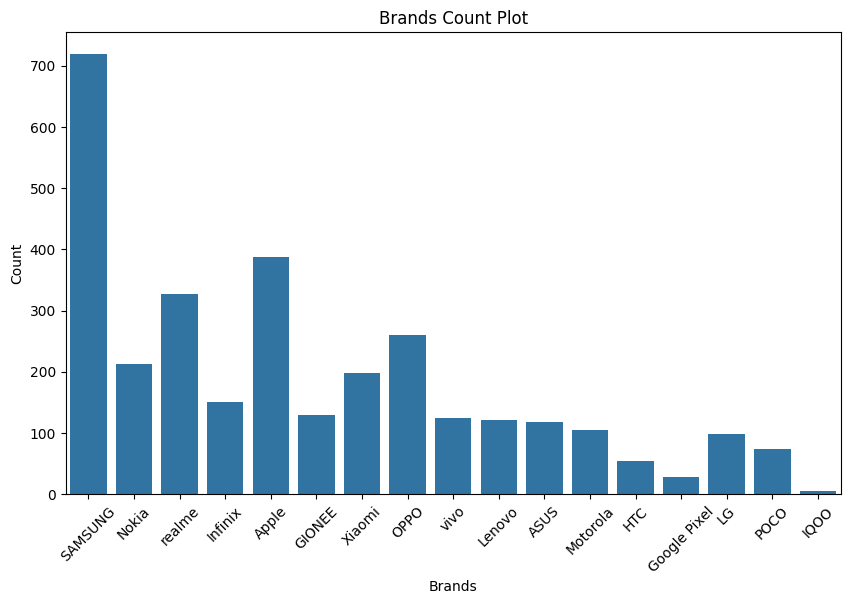

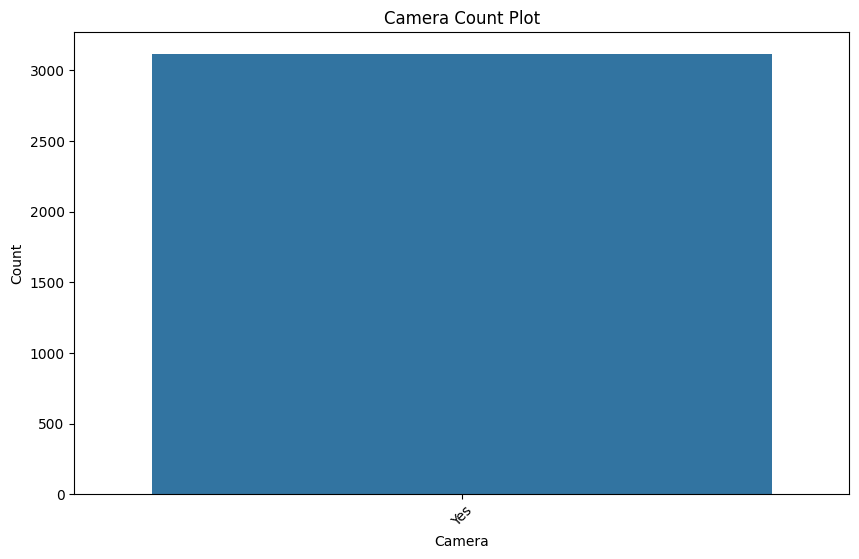

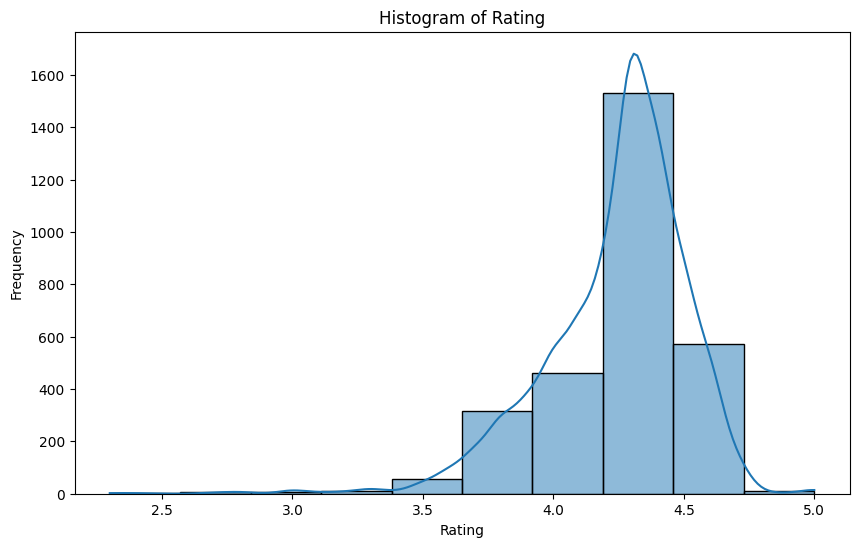

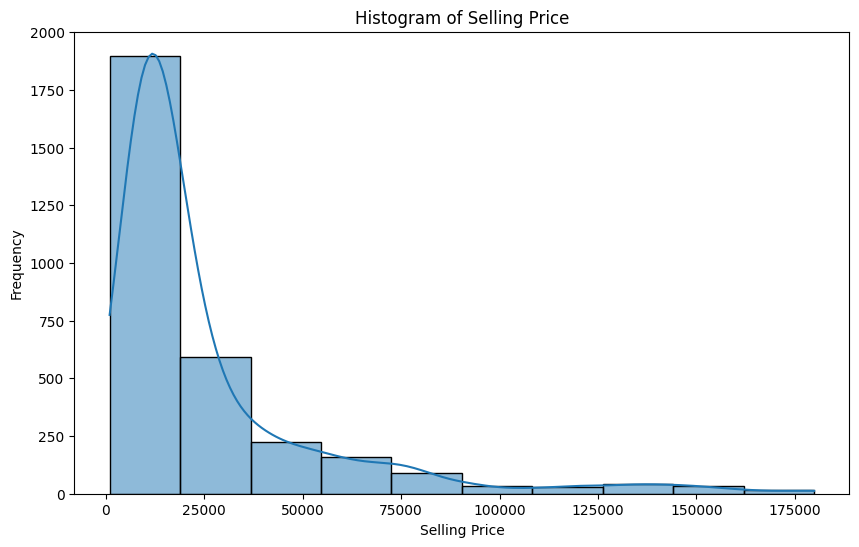

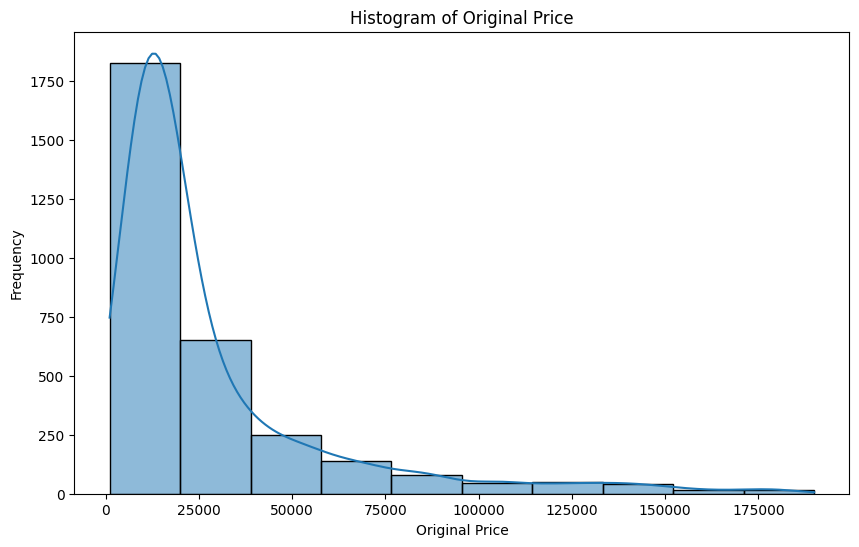

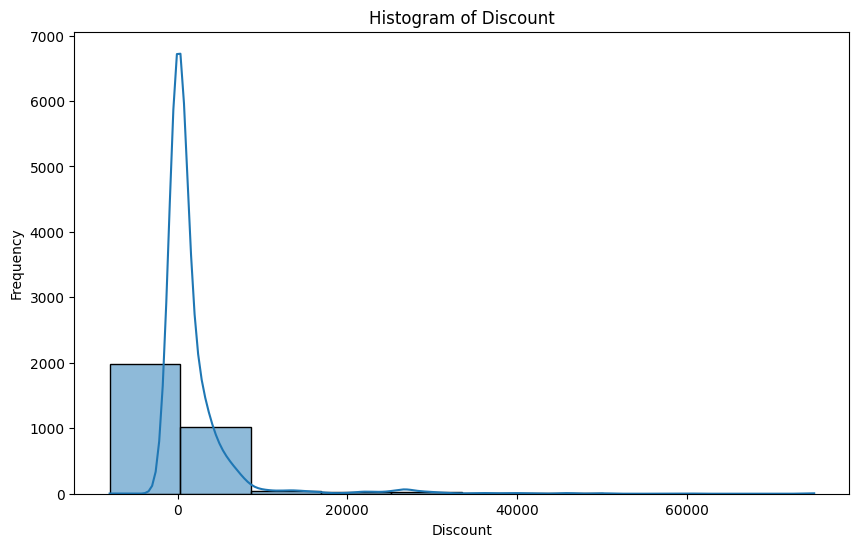

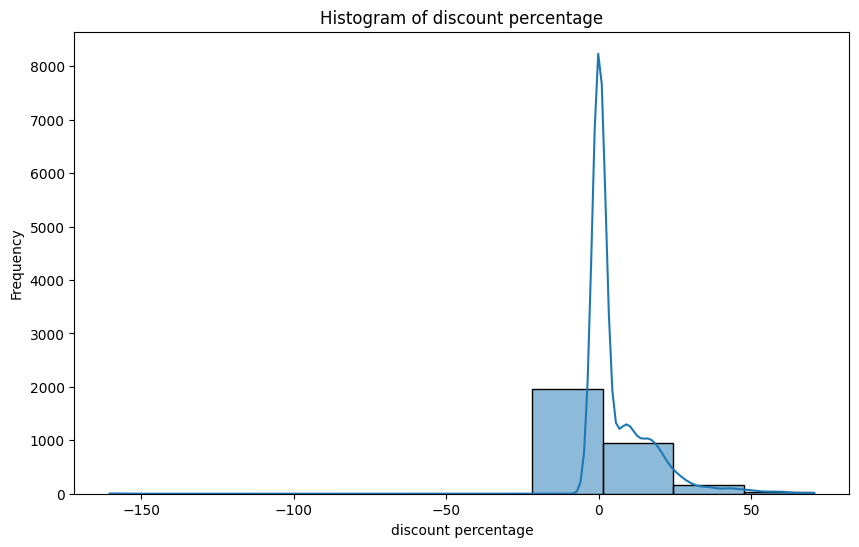

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    plt.figure(figsize=(10, 6))

    if df[column].dtype == 'object':
        sns.countplot(x=column, data=df)
        plt.title(f'{column} Count Plot')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    else:
        sns.histplot(df[column], bins=10, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.show()

In [210]:
df.isnull().sum()

Brands                   0
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Discount                 0
discount percentage      0
dtype: int64

In [211]:
df.isna().sum()

Brands                   0
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Discount                 0
discount percentage      0
dtype: int64

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [213]:
X = df.drop(columns=['Selling Price'])

In [214]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = ['Camera']
ordinal_features=['Brands']

In [215]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [216]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [217]:
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

In [218]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', cat_transformer, cat_features),
        ('ordinal', ordinal_transformer, ordinal_features)
    ])

# SVD Regressor

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

In [220]:
svd_lr_model = make_pipeline(TruncatedSVD(n_components=5), LinearRegression())

In [221]:
svd_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', svd_lr_model)
])

In [222]:
y = df['Selling Price']

In [223]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [224]:
svd_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Rating', 'Original Price',
                                                   'Discount',
                                                   'discount percentage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Camera']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Brands'])])),
                ('regressor',
                 Pipeline(steps=[('truncatedsvd', TruncatedSVD(n_components=5)),
                                 ('linearregression', LinearRegression())]))])

Loss Function => RMSE

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

y_train_pred = svd_reg_pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = svd_reg_pipeline.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

y_test_pred = svd_reg_pipeline.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse_scores = np.sqrt(-cross_val_score(svd_reg_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
cv_rmse_mean = cv_rmse_scores.mean()

print("RMSE for training set:", train_rmse)
print("RMSE for validation set:", val_rmse)
print("RMSE for test set:", test_rmse)
print("Cross-validation RMSE:", cv_rmse_mean)

RMSE for training set: 4.859467436511736e-11
RMSE for validation set: 4.949127049505755e-11
RMSE for test set: 4.7590265597384034e-11
Cross-validation RMSE: 2.5459701995151698e-11


# Batch GD (Not supported in Scikit-Learn)

# Mini-batch GD (Not supported in Scikit-Learn)

# Stochastic GD Regressor

In [226]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(loss='squared_error', eta0=0.01, max_iter=1000, tol=1e-3, penalty=None)

sgd_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', sgd_regressor)
])

In [227]:
sgd_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Rating', 'Original Price',
                                                   'Discount',
                                                   'discount percentage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Camera']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Brands'])])),
                ('regressor', SGDRegressor(penalty=None))])

Loss Function => RMSE

In [228]:
y_train_pred = sgd_reg_pipeline.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_val_pred = sgd_reg_pipeline.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

y_test_pred = sgd_reg_pipeline.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_rmse_scores = np.sqrt(-cross_val_score(sgd_reg_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
cv_rmse_mean = cv_rmse_scores.mean()

print("RMSE for training set:", train_rmse)
print("RMSE for validation set:", val_rmse)
print("RMSE for test set:", test_rmse)
print("Cross-validation RMSE:", cv_rmse_mean)

RMSE for training set: 2.850060620306876e+18
RMSE for validation set: 2.9332479059858826e+18
RMSE for test set: 2.829897907637911e+18
Cross-validation RMSE: 3.582305828269393e+17
